In [1]:
#importing all the neccessary libraries 

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Disable warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_path = "DATASET\DATASET\TEST"
test_path = "DATASET\DATASET\TRAIN"

In [3]:
#importing libraies 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from glob import  glob

In [4]:
# Data Loading and Preparation
x_data = []
y_data = []

for category in glob(train_path + '/*'):
    label = category.split(os.sep)[-1]
    for file in tqdm(glob(category + '/*'), desc=f"Processing {label}"):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(label)

# Convert to Pandas DataFrame for analysis
data = pd.DataFrame({'image': x_data, 'label': y_data})

Processing R: 100%|██████████| 1112/1112 [00:00<00:00, 2493.60it/s]


In [5]:
data.shape

(2513, 2)

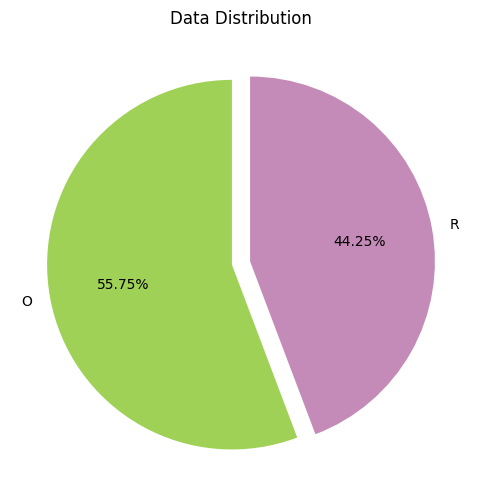

In [6]:
# Visualize Data Distribution
colors = ['#a0d157', '#c48bb8']
plt.figure(figsize=(8, 6))
plt.pie(data.label.value_counts(), labels=data.label.value_counts().index, autopct='%0.2f%%',
        colors=colors, startangle=90, explode=[0.05] * len(data.label.unique()))
plt.title("Data Distribution")
plt.show()


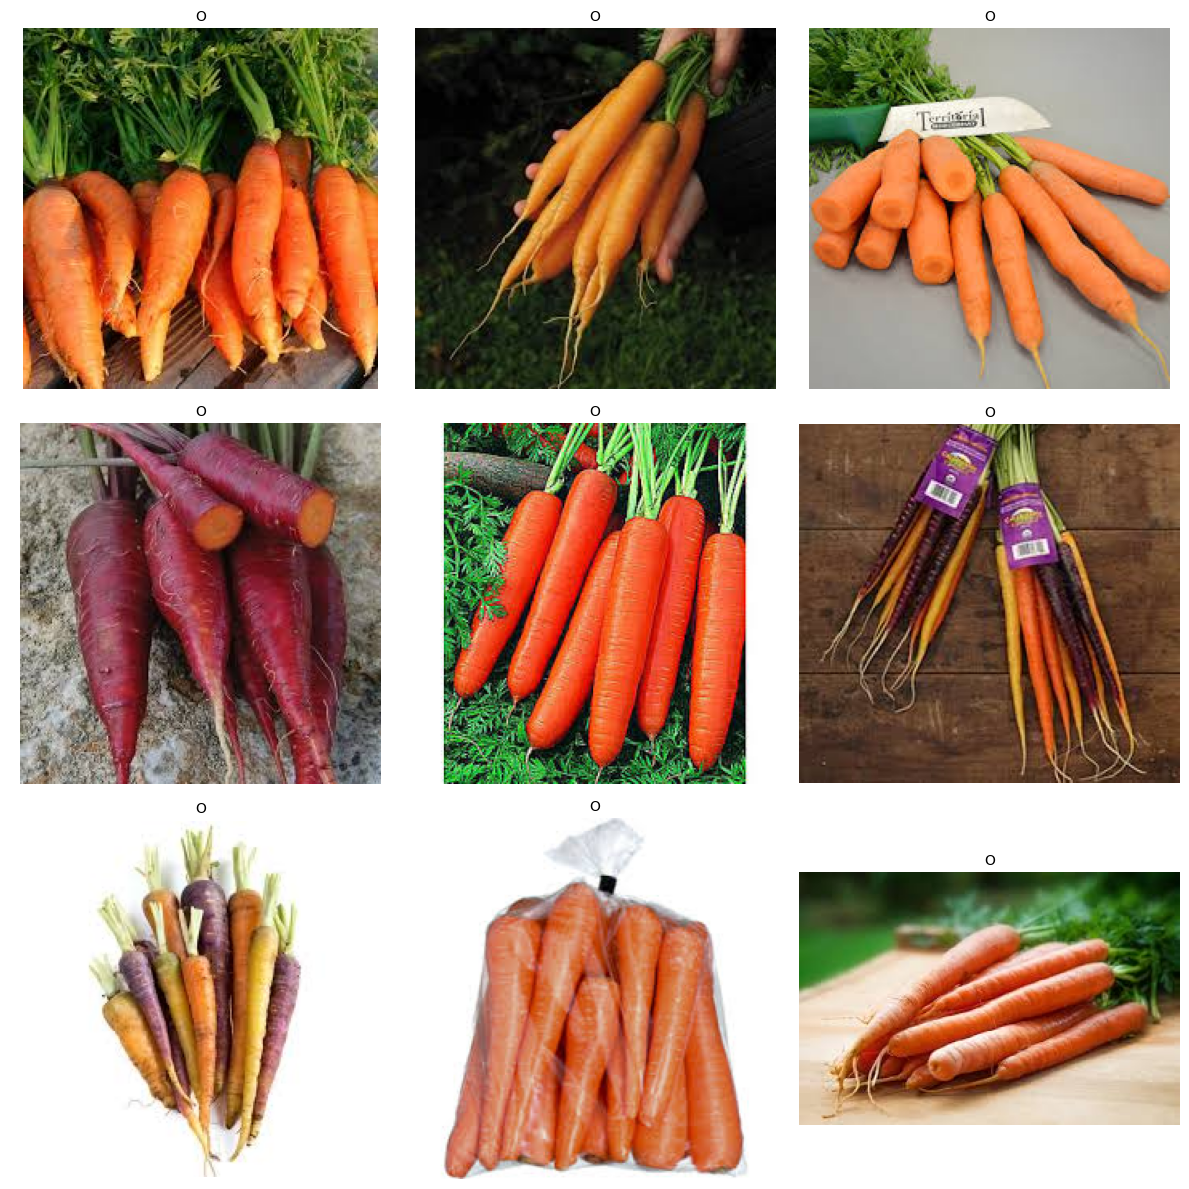

In [7]:
# Displaying Sample Images
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_data[i])
    plt.title(y_data[i], fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [8]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
# Model Definition
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Use softmax for multi-class classification
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 2513 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

In [11]:
# Data Generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2513 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [12]:

# Model Training
hist = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10
79/79 [==============================] - 46s 514ms/step - loss: 0.4694 - accuracy: 0.8102 - val_loss: 0.6338 - val_accuracy: 0.7871
Epoch 2/10
79/79 [==============================] - 38s 489ms/step - loss: 0.3170 - accuracy: 0.8918 - val_loss: 0.7284 - val_accuracy: 0.7718
Epoch 3/10
79/79 [==============================] - 39s 494ms/step - loss: 0.2830 - accuracy: 0.8949 - val_loss: 0.5521 - val_accuracy: 0.7886
Epoch 4/10
79/79 [==============================] - 39s 496ms/step - loss: 0.2633 - accuracy: 0.9117 - val_loss: 0.8314 - val_accuracy: 0.7609
Epoch 5/10
79/79 [==============================] - 42s 536ms/step - loss: 0.2368 - accuracy: 0.9168 - val_loss: 0.7482 - val_accuracy: 0.7531
Epoch 6/10
79/79 [==============================] - 39s 498ms/step - loss: 0.2360 - accuracy: 0.9196 - val_loss: 0.7444 - val_accuracy: 0.7820
Epoch 7/10
79/79 [==============================] - 38s 488ms/step - loss: 0.2308 - accuracy: 0.9200 - val_loss: 0.7108 - val_accuracy: 0.7896

In [15]:
# Save the Model
model_save_path = "saved_model.h5"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

Model saved at saved_model.h5


# Save the Model
model_save_path = "saved_model.h5"
model.save(model_save_path)
print(f"Model saved at {model_save_path}")

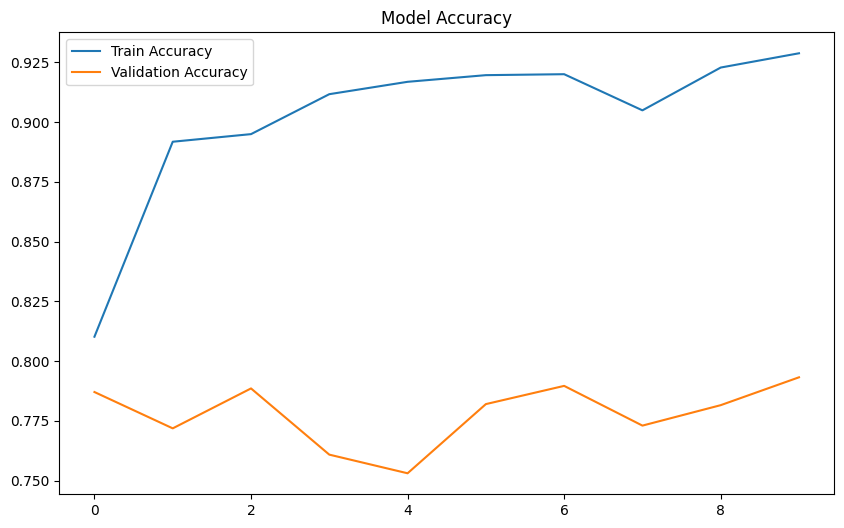

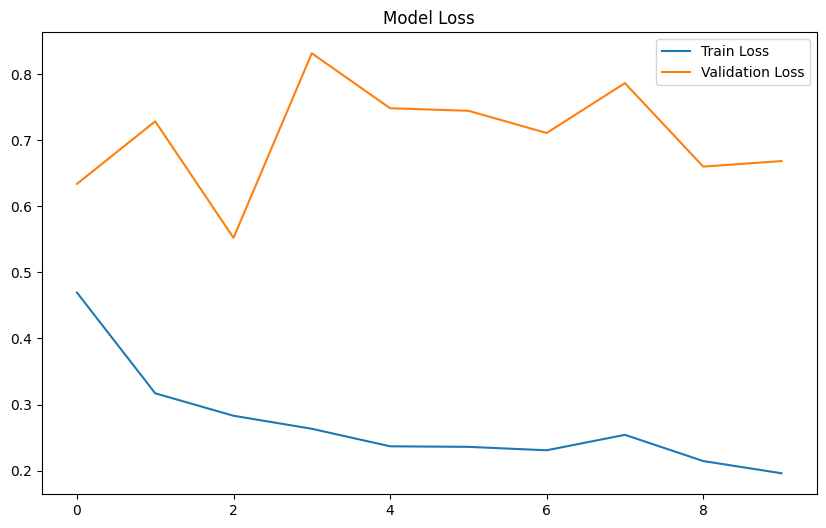

In [16]:
# Accuracy and Loss Plots
plt.figure(figsize=(10, 6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

1/1 [==============================] - 0s 55ms/step
The Image Shown is Organic Waste


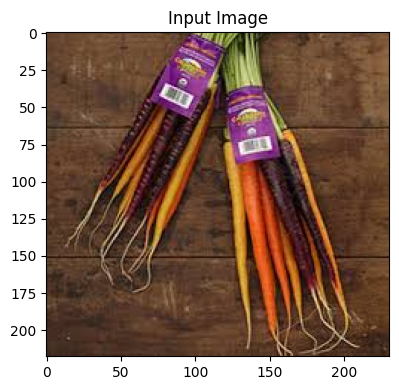

In [18]:
# Testing the Model
# Load the saved model
loaded_model = load_model('saved_model.h5')

# Prediction Function
def predict_fun(img, model=loaded_model):
    plt.figure(figsize=(6, 4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Input Image")
    plt.tight_layout()
    
    # Preprocess the image
    img_resized = cv2.resize(img, (224, 224))
    img_resized = np.expand_dims(img_resized, axis=0) / 255.0  # Normalize the image
    
    # Prediction
    result = np.argmax(model.predict(img_resized))
    labels = ['Recyclable', 'Organic']
    print(f"The Image Shown is {labels[result]} Waste")

# Test on a new image
test_image_path = 'DATASET\DATASET\TEST\O\O_12573.jpg'  # Replace with the path to a test image
test_img = cv2.imread(test_image_path)
predict_fun(test_img, model=loaded_model)